In [1]:
from nearline_helpers import *
%jsroot on

Welcome to JupyROOT 6.26/10


In [2]:
run_filter_dict = {
    0:   [333],
    0.3: [329],
    0.45:[330],
    0.6: [331],
    0.9: [332],

    # 0:[322],
    # 0.3:[323],
    # 0.45:[324],
    # 0.6:[325],
    # 0.9:[326],
}

In [3]:
def convert_filter(filter):
    return np.power(10,-1.0*filter)

for filter in run_filter_dict:
    print(filter, convert_filter(filter))

0 1.0
0.3 0.5011872336272722
0.45 0.35481338923357547
0.6 0.251188643150958
0.9 0.12589254117941673


In [4]:
1/0.3 

3.3333333333333335

In [5]:
chains = {fi:load_chain(runs) for fi,runs in run_filter_dict.items() }

In [6]:
chains

{0: <cppyy.gbl.TChain object at 0x558a0cbfdc20>,
 0.3: <cppyy.gbl.TChain object at 0x558a0e2313c0>,
 0.45: <cppyy.gbl.TChain object at 0x558a0e2c83e0>,
 0.6: <cppyy.gbl.TChain object at 0x558a0cbd8fb0>,
 0.9: <cppyy.gbl.TChain object at 0x558a0cbd8a00>}

In [7]:
led_hists = {}
led_means = {}
for i, (filter, t) in enumerate(chains.items()):
    # print(i, filter, t.GetEntries())
    t.SetLineColor(i)
    hi = r.TH1D(f"h{i}",f"Integrated charge in filter {filter}", 1000,0,400000)
    t.Draw(f"integrals.integral>>h{i}",f"integrals.channelTag == 0 && integrals.amcNum == 2", "goff")
    led_means[filter] = hi.GetMean()
    led_hists[filter] = uproot.from_pyroot(hi).to_hist()

led_means

{0: 30982.789881214256,
 0.3: 11980.891606594047,
 0.45: 6379.019458627143,
 0.6: 3750.3100502070115,
 0.9: 1294.0927980443776}

{0: 235258.03907317805, 0.3: 189561.7659625594, 0.45: 165984.29274657636, 0.6: 154288.19453007967, 0.9: 106215.18101729987}
{0: 232412.58592462205, 0.3: 189287.8752724228, 0.45: 166480.36408136872, 0.6: 157290.9572212922, 0.9: 111305.18224269728}
{0: 107778.97938114112, 0.3: 62709.78127968714, 0.45: 42356.867505470436, 0.6: 34511.132390851155, 0.9: 12924.641230054045}
{0: 240864.4892535563, 0.3: 178349.93577535616, 0.45: 141802.21030877676, 0.6: 126023.27681670086, 0.9: 70735.43356211619}
{0: 211981.46722099982, 0.3: 160036.03474713594, 0.45: 136283.47872599043, 0.6: 125103.896896562, 0.9: 81060.76012285332}


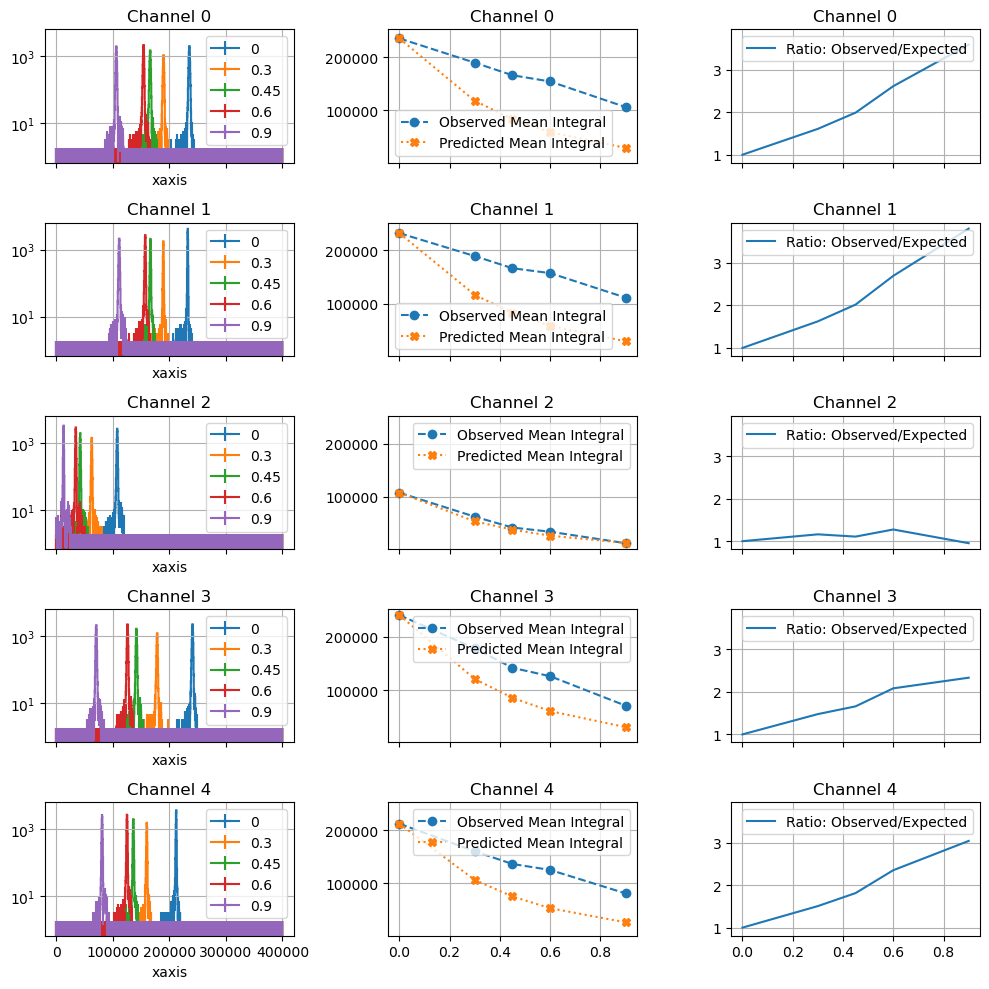

Warning in <TROOT::Append>: Replacing existing TH1: h0 (Potential memory leak).


In [8]:
# c = r.TCanvas()
# channel = 0
results = {}
fig,axs = plt.subplots(5,3,figsize=(10,10),sharex='col',sharey='col')
for channel in range(5):
    ax = axs[channel,:]
    hists = {}
    means = {}
    for i, (filter, t) in enumerate(chains.items()):
        # print(i, filter, t.GetEntries())
        t.SetLineColor(i)
        hi = r.TH1D(f"h{i}",f"Integrated charge in filter {filter}", 1000,0,400000)
        t.Draw(f"integrals.integral>>h{i}",f"integrals.channelTag == {channel} && integrals.amcNum == 1", "goff")
        means[filter] = hi.GetMean()
        hists[filter] = uproot.from_pyroot(hi).to_hist()
        # print(hi.GetMean())
    # c.SetLogy()
    # c.Draw()
    print(means)
    for filter,hi in hists.items():
        hi.plot(ax=ax[0], label=filter)

    filters = [x for x in hists]
    ms = np.array([means[x] for x in filters])
    expected = np.array([means[0]*convert_filter(filter) for filter in filters])

    # ms = np.array([means[x] for x in filters])
    # expected = np.array([means[0.9]*convert_filter(filter)/convert_filter(0.9) for filter in filters])
    # expected = np.array([means[0]*convert_filter(filter) for filter in filters])/means[0.9]

    ax[1].plot(filters,ms,'o--', label='Observed Mean Integral')
    ax[1].plot(filters,expected,'X:', label='Predicted Mean Integral')

    ax[2].plot(filters, ms/expected,label='Ratio: Observed/Expected')

    for axi in ax:
        axi.set_title(f'Channel {channel}')
        axi.legend()
        axi.grid()
    ax[0].set_yscale("log")

    results[channel] = (hists,means)
plt.tight_layout()
plt.show()

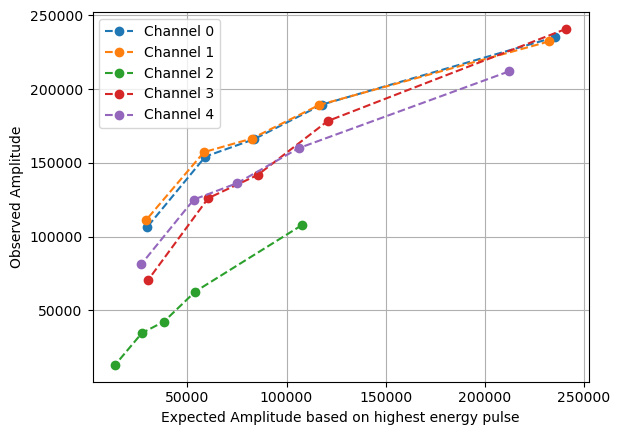

In [9]:
for channel,(hists,means) in results.items():
    filters = [x for x in hists]
    ms = np.array([means[x] for x in filters])
    expected = np.array([means[0]*convert_filter(filter) for filter in filters])
    plt.plot(expected,ms,'o--', color=f'C{channel}',label=f'Channel {channel}')
    # plt.plot(filters,expected,'X:', color=f'C{channel}',label=f'Expected Channel {channel}')
    # break
plt.xlabel("Expected Amplitude based on highest energy pulse")
plt.ylabel("Observed Amplitude")
plt.legend()
plt.grid()
plt.show()

{0: 235258.03907317805, 0.3: 189561.7659625594, 0.45: 165984.29274657636, 0.6: 154288.19453007967, 0.9: 106215.18101729987}
{0: 232412.58592462205, 0.3: 189287.8752724228, 0.45: 166480.36408136872, 0.6: 157290.9572212922, 0.9: 111305.18224269728}
{0: 107778.97938114112, 0.3: 62709.78127968714, 0.45: 42356.867505470436, 0.6: 34511.132390851155, 0.9: 12924.641230054045}
{0: 240864.4892535563, 0.3: 178349.93577535616, 0.45: 141802.21030877676, 0.6: 126023.27681670086, 0.9: 70735.43356211619}
{0: 211981.46722099982, 0.3: 160036.03474713594, 0.45: 136283.47872599043, 0.6: 125103.896896562, 0.9: 81060.76012285332}


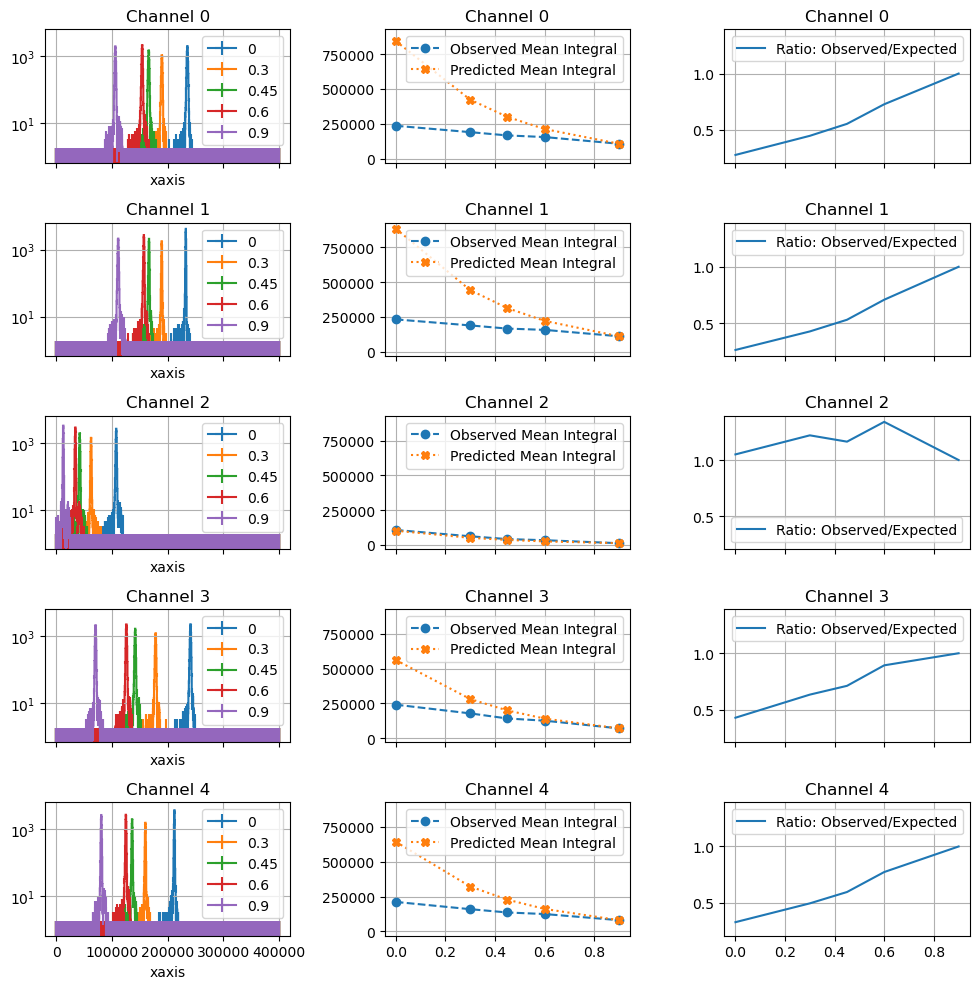

In [10]:
# c = r.TCanvas()
# channel = 0
results = {}
fig,axs = plt.subplots(5,3,figsize=(10,10),sharex='col',sharey='col')
for channel in range(5):
    ax = axs[channel,:]
    hists = {}
    means = {}
    for i, (filter, t) in enumerate(chains.items()):
        # print(i, filter, t.GetEntries())
        t.SetLineColor(i)
        hi = r.TH1D(f"h{i}",f"Integrated charge in filter {filter}", 1000,0,400000)
        t.Draw(f"integrals.integral>>h{i}",f"integrals.channelTag == {channel} && integrals.amcNum == 1", "goff")
        means[filter] = hi.GetMean()
        hists[filter] = uproot.from_pyroot(hi).to_hist()
        # print(hi.GetMean())
    # c.SetLogy()
    # c.Draw()
    print(means)
    for filter,hi in hists.items():
        hi.plot(ax=ax[0], label=filter)

    filters = [x for x in hists]
    # ms = np.array([means[x] for x in filters])
    # expected = np.array([means[0]*convert_filter(filter) for filter in filters])

    ms = np.array([means[x] for x in filters])
    expected = np.array([means[0.9]*convert_filter(filter)/convert_filter(0.9) for filter in filters])
    # expected = np.array([means[0]*convert_filter(filter) for filter in filters])/means[0.9]

    ax[1].plot(filters,ms,'o--', label='Observed Mean Integral')
    ax[1].plot(filters,expected,'X:', label='Predicted Mean Integral')

    ax[2].plot(filters, ms/expected,label='Ratio: Observed/Expected')

    for axi in ax:
        axi.set_title(f'Channel {channel}')
        axi.legend()
        axi.grid()
    ax[0].set_yscale("log")

    results[channel] = (hists,means)
plt.tight_layout()
plt.show()

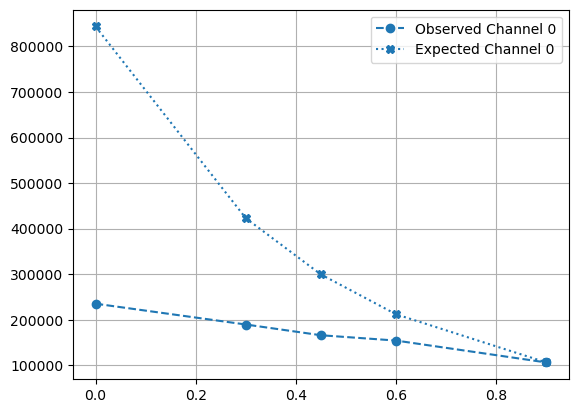

In [11]:
for channel,(hists,means) in results.items():
    filters = [x for x in hists]
    ms = np.array([means[x] for x in filters])
    expected = np.array([means[0.9]*convert_filter(filter)/convert_filter(0.9) for filter in filters])
    plt.plot(filters,ms,'o--', color=f'C{channel}',label=f'Observed Channel {channel}')
    plt.plot(filters,expected,'X:', color=f'C{channel}',label=f'Expected Channel {channel}')
    break
plt.legend()
plt.grid()
plt.show()

In [16]:
led_means

{0: 30982.789881214256,
 0.3: 11980.891606594047,
 0.45: 6379.019458627143,
 0.6: 3750.3100502070115,
 0.9: 1294.0927980443776}

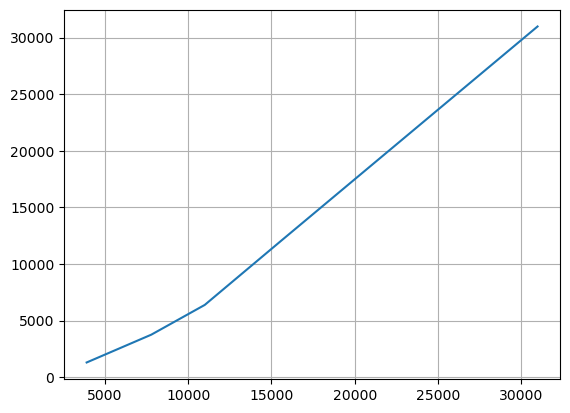

In [24]:
# pmt_means = np.array([1, 0.819845, 0.7212, 0.661774, 0.479568]) * means[0.9]
ref = 0
pmt_means = [led_means[x] for x in filters]
expected = np.array([led_means[ref]*convert_filter(filter)/convert_filter(ref) for filter in filters])
plt.plot(expected,pmt_means)
plt.grid()
plt.show()

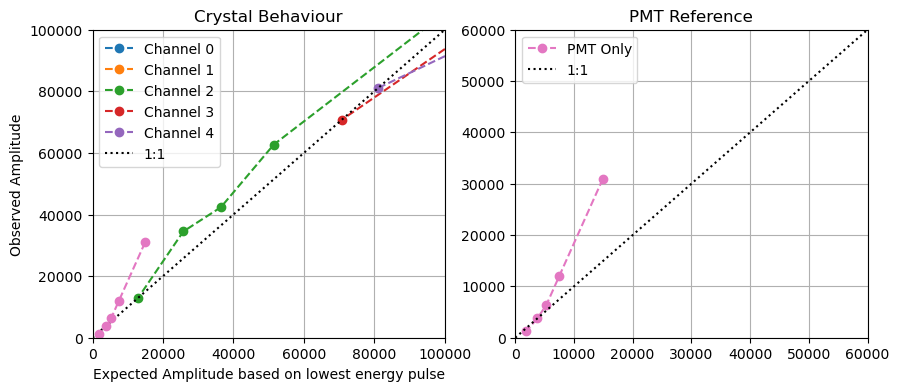

In [45]:
fig,ax = plt.subplots(1,2,figsize=(10,4))
plt.sca(ax[0])
plt.title('Crystal Behaviour')
for channel,(hists,means) in results.items():
    filters = [x for x in hists]
    ms = np.array([means[x] for x in filters])
    expected = np.array([means[0.9]*convert_filter(filter)/convert_filter(0.9) for filter in filters])
    plt.plot(expected,ms,'o--', color=f'C{channel}',label=f'Channel {channel}')
    # plt.plot(filters,expected,'X:', color=f'C{channel}',label=f'Expected Channel {channel}')
    # break

plt.xlabel("Expected Amplitude based on lowest energy pulse")
plt.ylabel("Observed Amplitude")
plt.plot([0,800000],[0,800000],':',color='black',label='1:1')
plt.legend()
plt.ylim(0,300000)
plt.xlim(0,900000)
plt.xlim(0,100000)
plt.ylim(0,100000)
plt.grid()

plt.sca(ax[1])
plt.title("PMT Reference")
# pmt_means = np.array([1, 0.819845, 0.7212, 0.661774, 0.479568])

ref = 0.6
pmt_means = [led_means[x] for x in filters]
expected = np.array([led_means[ref]*convert_filter(filter)/convert_filter(ref) for filter in filters])

plt.plot(expected,pmt_means, 'C6o--',label='PMT Only')
ax[0].plot(expected,pmt_means, 'C6o--',label='PMT Only')
plt.plot([0,60000],[0,60000],'k:',label='1:1')
plt.ylim(0,60000)
plt.xlim(0,60000)
plt.grid()
plt.legend()

plt.show()

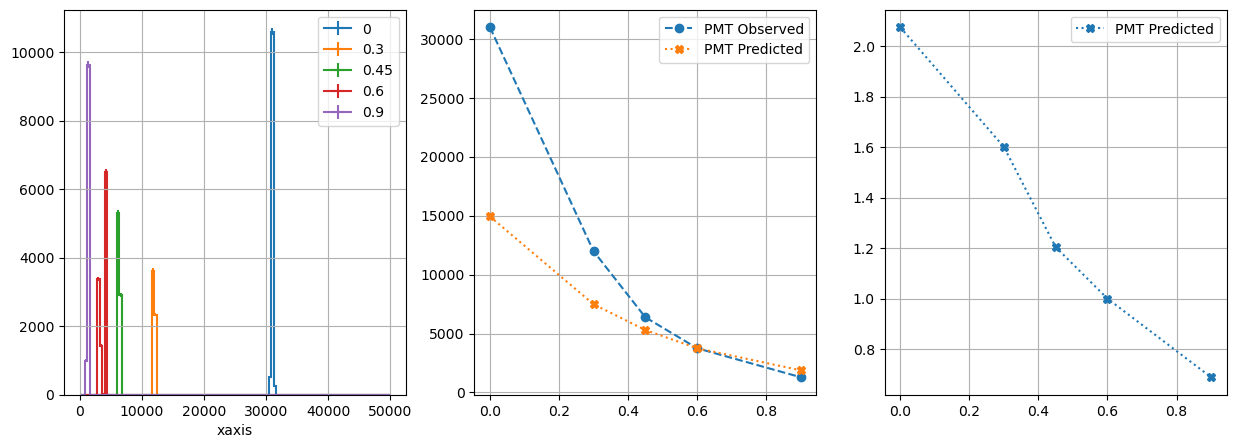

In [42]:
fig,ax = plt.subplots(1,3,figsize=(15,5))
for x,hi in led_hists.items():
    hi[:50000j].plot(ax=ax[0],label=x)

ref = 0.6
filters = [x for x in led_hists]
pmt_means = [led_means[x] for x in filters]
expected = np.array([led_means[ref]*convert_filter(filter)/convert_filter(ref) for filter in filters])

ax[1].plot(filters,pmt_means, 'o--',label='PMT Observed')
ax[1].plot(filters,expected, 'X:',label='PMT Predicted')
ax[1].plot()

ax[2].plot(filters,pmt_means/expected, 'X:',label='PMT Predicted')

for axi in ax:
    axi.grid()
    axi.legend()


plt.show()

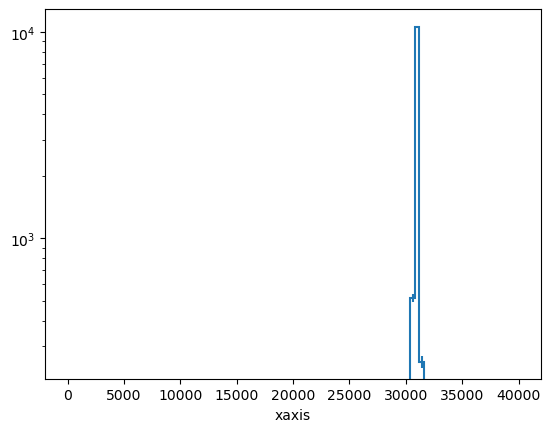

In [38]:
led_hists[0][:40000j].plot()
plt.yscale("log")

In [32]:
np.array(pmt_means)

array([30982.78988121, 11980.89160659,  6379.01945863,  3750.31005021,
        1294.09279804])

In [33]:
expected

array([14930.25322786,  7482.85231263,  5297.45374989,  3750.31005021,
        1879.60751931])

In [21]:
np.array(pmt_means)/pmt_means[0]

array([1.        , 0.38669505, 0.20588912, 0.12104494, 0.04176812])

In [ ]:
{1, 0.369777, 0.218399, 0.148511, 0.0695959}

In [ ]:
pmt_means = np.array([1, 0.819845, 0.7212, 0.661774, 0.479568])

In [ ]:
expected = np.array([means[0.9]*convert_filter(filter)/convert_filter(0.9) for filter in filters])

In [ ]:
ms/pmt_means, expected

In [ ]:
for channel,(hists,means) in results.items():
    fig,ax = plt.subplots(1,2,figsize=(10,4))
    plt.sca(ax[0])
    plt.title('Crystal Behaviour')
    filters = [x for x in hists]
    ms = np.array([means[x] for x in filters])
    expected = np.array([means[0.9]*convert_filter(filter)/convert_filter(0.9) for filter in filters])
    plt.plot(filters,ms,'o--', color=f'C{channel}',label=f'Channel {channel}')
    plt.plot(filters,ms/pmt_means,'X:', color=f'C{channel}',label=f'PMT Corrected Channel {channel}')
    # plt.plot(filters,expected,'X:', color=f'C{channel}',label=f'Expected Channel {channel}')
    # break

    # plt.xlabel("Expected Amplitude based on lowest energy pulse")
    # plt.ylabel("Observed Amplitude")
    # plt.plot([0,800000],[0,800000],':',color='black',label='1:1')
    plt.legend()
    # plt.ylim(0,300000)
    # plt.xlim(0,900000)
    plt.grid()

    plt.sca(ax[1])
    plt.title("PMT Reference")
    expected = np.array([pmt_means[-1]*convert_filter(filter)/convert_filter(0.9) for filter in filters])
    plt.plot(filters,pmt_means, 'C6o--')
    plt.plot(filters,pmt_means/pmt_means, 'C6X:')
    # plt.plot([0,1],[0,1],'k:')
    # plt.ylim(0,1)
    # plt.xlim(0,3)
    plt.grid()

    plt.show()

0 11366
0.3 5966
0.45 8226
0.6 11354
0.9 10637


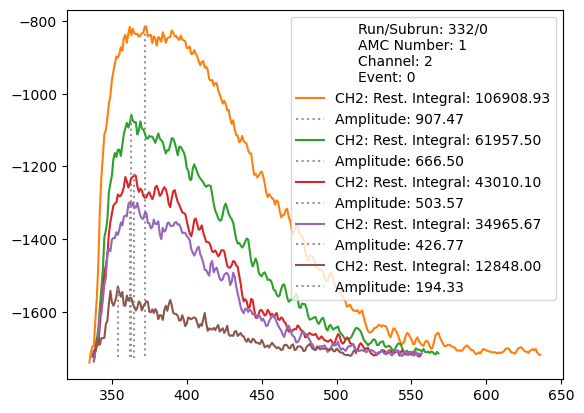

0 11366
0.3 5966
0.45 8226
0.6 11354
0.9 10637


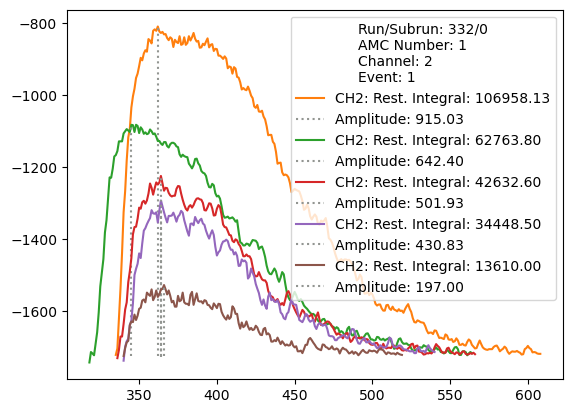

0 11366
0.3 5966
0.45 8226
0.6 11354
0.9 10637


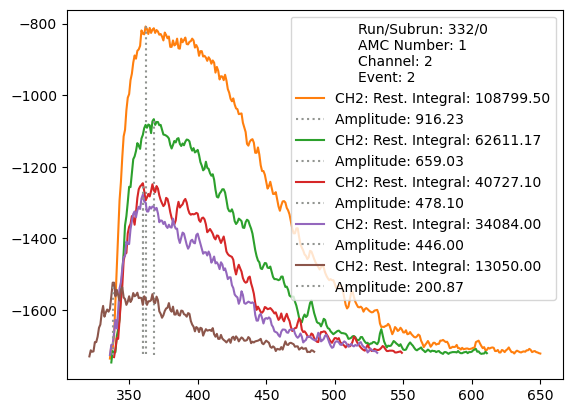

0 11366
0.3 5966
0.45 8226
0.6 11354
0.9 10637


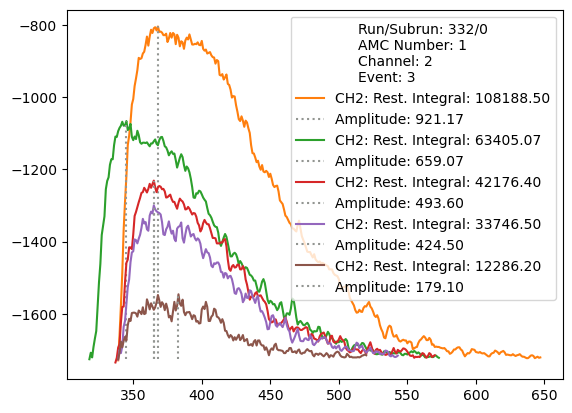

0 11366
0.3 5966
0.45 8226
0.6 11354
0.9 10637


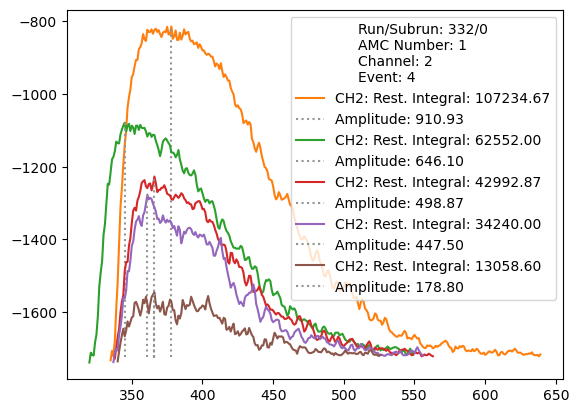

In [13]:
channel = 2
for entry in range(5):
    fig,ax = plt.subplots()
    for counter,(filter, t) in enumerate(chains.items()):
        print(filter,t.GetEntries())
        t.GetEntry(entry)
        # for i, e in enumerate(t):
        wfi = [wfi for wfi in t.integrals if (wfi.channelTag == channel and wfi.amcNum == 1)][0]
        plot_integral(wfi,ax=ax, color_offset=counter, plot_full=False, plot_pedestal=False)
        # break
    plt.show()

0 11366
0.3 5966
0.45 8226
0.6 11354
0.9 10637


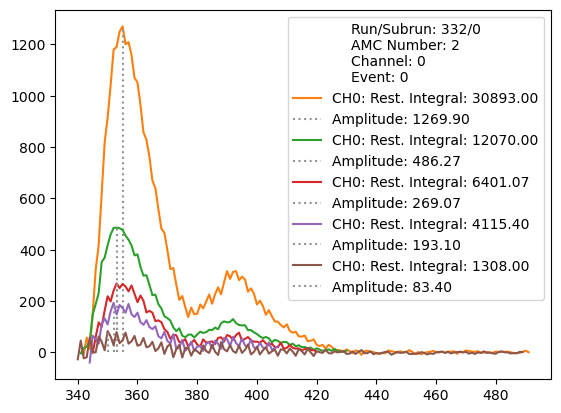

0 11366
0.3 5966
0.45 8226
0.6 11354
0.9 10637


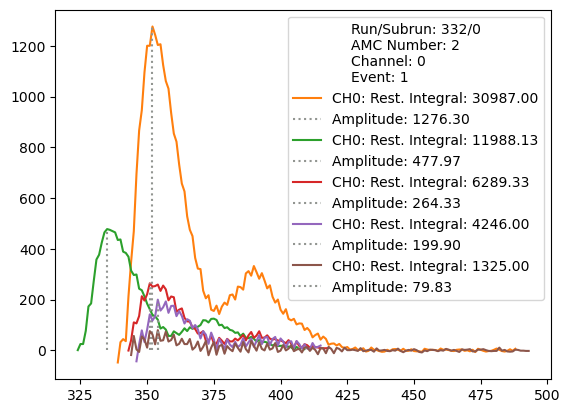

0 11366
0.3 5966
0.45 8226
0.6 11354
0.9 10637


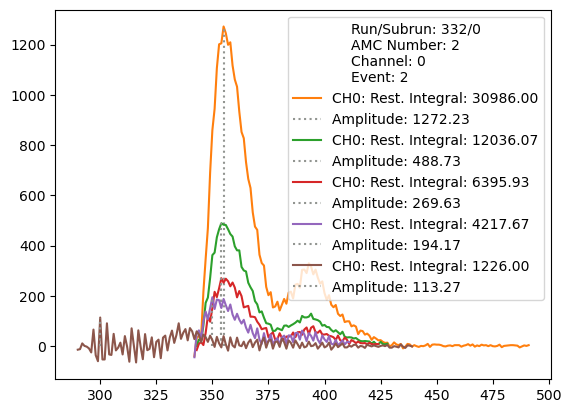

0 11366
0.3 5966
0.45 8226
0.6 11354
0.9 10637


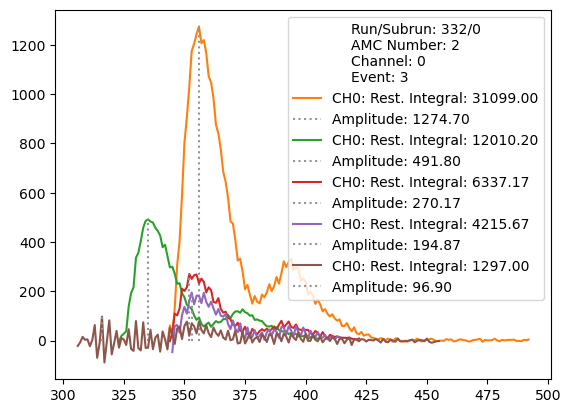

0 11366
0.3 5966
0.45 8226
0.6 11354
0.9 10637


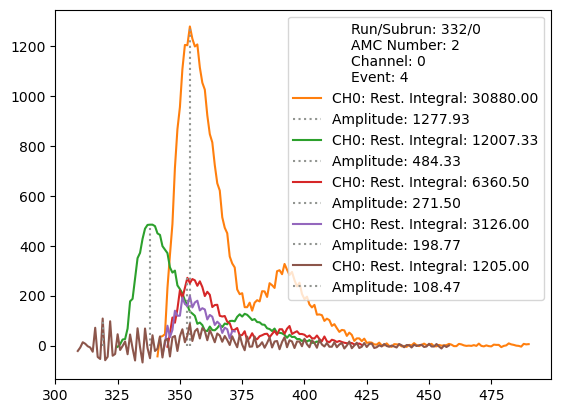

In [22]:
for entry in range(5):
    fig,ax = plt.subplots()
    for counter,(filter, t) in enumerate(chains.items()):
        print(filter,t.GetEntries())
        t.GetEntry(entry)
        # for i, e in enumerate(t):
        wfi = [wfi for wfi in t.integrals if (wfi.channelTag == 0 and wfi.amcNum == 2)][0]
        plot_integral(wfi,ax=ax, color_offset=counter, plot_full=False, plot_pedestal=False, subtract_pedestal=True)
        # break
    plt.show()

0 11366


NameError: name 'channel' is not defined

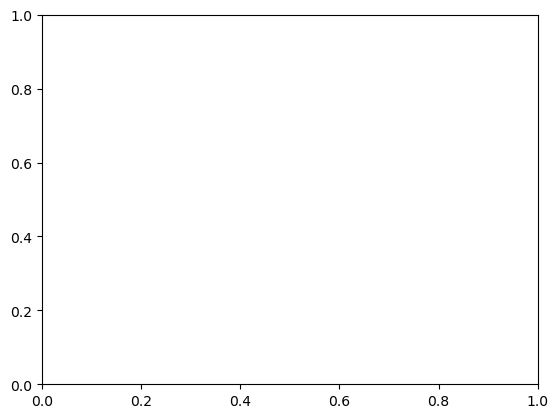

In [8]:
fig,ax = plt.subplots()
for counter,(filter, t) in enumerate(chains.items()):
    print(filter,t.GetEntries())
    for i, e in enumerate(t):
        wfi = [wfi for wfi in e.integrals if wfi.channelTag == channel][0]
        plot_integral(wfi,ax=ax, color_offset=counter, plot_full=False, plot_pedestal=False)
        break
plt.show()